In [2]:
import pandas as pd
from clustering.utils import *
from sklearn.decomposition import non_negative_factorization
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
%cd ..

/home/anuar/PycharmProjects/master-thesis


# New Experiments

In [4]:
import numpy as np
from utils import *
cluster_input_train, cluster_input_all = get_cluster_input_data_experiments() # anpassen

In [6]:
X = cluster_input_train
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

/home/anuar/PycharmProjects/master-thesis/venv/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [13]:
W_new = model.transform(cluster_input_all)
W_new

array([[0.48225267, 0.44728555],
       [0.2022907 , 0.38043487],
       [0.42812216, 0.78899917],
       ...,
       [0.47678378, 0.43449253],
       [0.35576841, 0.50970512],
       [0.5080551 , 0.52900011]])

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(W_new)
centroids = kmeans.cluster_centers_

In [18]:
centroids

array([[0.49859262, 0.53699073],
       [0.24011978, 0.84771392]])

In [23]:
labels = kmeans.labels_

In [24]:
labels

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [25]:
np.argmax(model.transform(cluster_input_all),axis=1)

array([0, 0, 0, ..., 0, 0, 0])

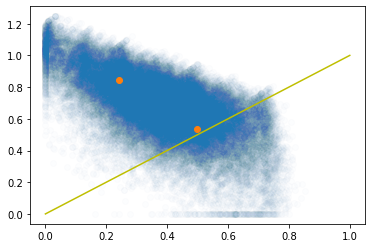

In [19]:
plt.scatter(W_new[:,0],W_new[:,1], alpha=0.01)
plt.plot([0,0.5,1],[0,0.5,1],'y', label='dividing line if argmax is used to label')
plt.scatter(centroids[:,0],centroids[:,1])
plt.show()

# Import Data

In [39]:
df, answers, info_dict = get_cluster_input_data(scaler=None)
df.head()
answers = answers.T

# Metrics for optimal number of latent factors (clusters)

## Residual sum of squares against randomized data (RSS)
For any dimensionality reduction approach, there is always a loss of information compared to your original data (estimated by RSS). Now perform NMF for increasing K and calculate RSS with both your original dataset and a randomized dataset. When comparing RSS in function of K, the RSS decreases with increasing K in the original dataset, but this is less the case for the randomized dataset. By comparing both slopes, there should be an K where they cross. In other words, how much information could you afford to lose (=highest K) before being within the noise.

In [40]:
np.random.seed(0)
answers_rand = (np.random.rand(*answers.shape)*7).round() # Create random answer matrix

In [41]:
H_list = []
for k in tqdm(range(2,10)):
    W, H, n_iter = non_negative_factorization(answers.T, n_components=2,max_iter=2000,init='random')
    H_list.append(H)

100%|██████████| 8/8 [02:19<00:00, 17.42s/it]


In [42]:
answers.shape
W.shape

(122829, 2)

In [32]:
Hs_matrix = np.stack(H_list)

In [35]:
Hs_matrix.shape

(8, 2, 23)

In [34]:
Hs_matrix.mean(axis=0)

array([[1.66951406, 2.12834783, 2.18437492, 2.07823759, 2.22626193,
        0.89175098, 0.5845344 , 2.17205095, 1.91475253, 1.81809366,
        2.04145729, 1.96050852, 1.90164735, 1.77508169, 2.01649313,
        0.89254547, 2.26399842, 1.58583914, 2.167143  , 2.12949003,
        0.92934126, 2.09574553, 0.51391788],
       [1.35633255, 1.02342679, 1.43371807, 1.11959388, 1.40491886,
        2.49988538, 2.29423651, 1.77370242, 1.61286578, 1.41842364,
        1.80925022, 1.61302299, 1.60472124, 1.59465323, 1.66830997,
        0.86150579, 1.17351987, 1.20463309, 1.12594834, 0.8570594 ,
        2.36352068, 0.68779246, 0.89042637]])

In [6]:
W_dist = []
H_dist = []
for k in range (2,10):
    W_s = []
    _dist_W = 0
    H_s = []
    _dist_H = 0
    for i in range(10):
        print(k,i)
        W, H, n_iter = non_negative_factorization(answers, n_components=k, max_iter=2000, init='random', random_state=0)
        for point_W in W_s:
            _dist_W += np.linalg.norm(W-point_W)
        W_s.append(W)

        for point_H in H_s:
            _dist_H += np.linalg.norm(H-point_H)
        H_s.append(H)

    W_dist.append(_dist_W)
    H_dist.append(_dist_H)

In [9]:
W, H, n_iter = non_negative_factorization(answers, n_components=2,max_iter=2000,init='random', random_state=0)

In [72]:
features_desc = W.copy()
features_desc  = pd.DataFrame(features_desc)
features_desc['description'] = behaviour_cols

In [73]:
df[['NMF_non_careful','NMF_careful']] = H.T

In [74]:
W3, H3, n_iter = non_negative_factorization(answers, n_components=3,max_iter=2000,init='random', random_state=0)

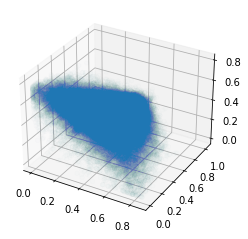

In [75]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(H3[0], H3[1], H3[2],alpha=0.009)
plt.show()

In [76]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(H.T)

In [77]:
centroids = kmeans.cluster_centers_

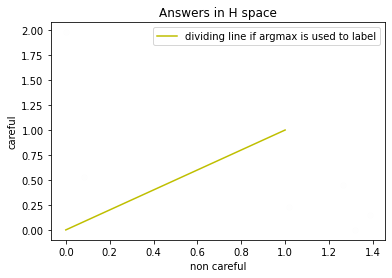

In [9]:
import matplotlib.pyplot as plt
plt.plot([0,0.5,1],[0,0.5,1],'y', label='dividing line if argmax is used to label')
plt.scatter(H[0,:], H[1,:], alpha=0.00199)
plt.scatter(centroids[:,0],centroids[:,1])
plt.legend()
plt.title('Answers in H space')
plt.xlabel('non careful')
plt.ylabel('careful')
plt.show()

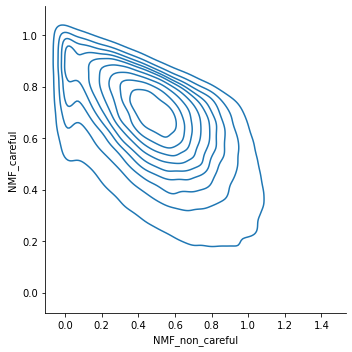

In [82]:
sns.displot(df, x='NMF_non_careful', y='NMF_careful', kind="kde")
plt.show()

In [84]:
df['group'] = df['NMF_non_careful'].apply(lambda x: 0 if x<0.05 else 1)

In [85]:
df.to_csv('data/clustering/220322_nmf.csv',index=False)